In [1]:
from pathlib import Path

import mdtraj
import py3Dmol
from rdkit import Chem

from lammps_utils.io import MolFromLAMMPSData, data2pdb


In [2]:
filepath_data = Path("./eq3.data")

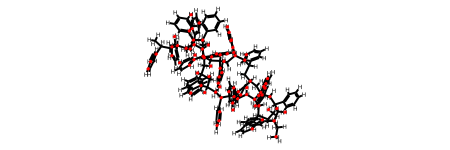

In [3]:
mol = MolFromLAMMPSData(filepath_data)
mol

In [4]:
view = py3Dmol.view(width="100%")  # viewオブジェクトの生成
view.addModel(
    Chem.MolToMolBlock(mol), "sdf", {"keepH": True}
)  # viewオブジェクトにはMolBlock形式かPDB形式で分子を渡す必要があるため、`Chem.MolToMolBlock`関数でMolBlock形式に変換
view.setStyle(
    {"stick": {"radius": 0.25}, "sphere": {"scale": 0.35}}
)  # 分子の表示スタイルを設定
view.show()  # viewオブジェクトを表示

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [5]:
# convert LAMMPS data file to GROMACS gro file to load it with MDTraj
# data2gro(filepath_data, filepath_data.with_suffix(".gro"))
data2pdb(filepath_data, filepath_data.with_suffix(".pdb"))

In [6]:
traj_pdb: mdtraj.Trajectory = mdtraj.load_pdb(
    filepath_data.with_suffix(".pdb")
)
traj_pdb.xyz[0]

array([[-0.612 , -0.2793,  0.6644],
       [-0.5427, -0.3333,  0.5987],
       [-0.5555, -0.2046,  0.7217],
       ...,
       [-0.3409,  0.697 , -0.3469],
       [-0.4767,  0.7013, -0.2359],
       [-0.3224,  0.64  , -0.1725]], dtype=float32)

In [7]:
for chain in traj_pdb.topology.chains:
    print(
        mdtraj.compute_rg(
            traj_pdb.atom_slice(
                [atom.index for atom in chain.atoms]
            ).make_molecules_whole()
        )
    )

[0.72662432]
[0.75002173]


In [8]:
traj_pdb_unwrap = traj_pdb.make_molecules_whole()
for chain in traj_pdb_unwrap.topology.chains:
    print(
        mdtraj.compute_rg(
            traj_pdb_unwrap.atom_slice(
                [atom.index for atom in chain.atoms]
            ).make_molecules_whole()
        )
    )

[0.72662432]
[0.75002173]
